# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


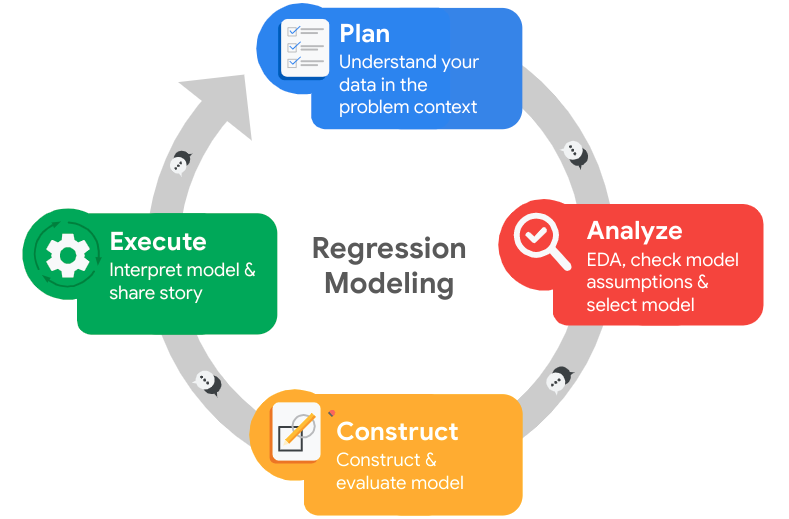

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




> **Stakeholders:**  
> The primary stakeholder is the Human Resources (HR) department, as they will use the results to inform retention strategies. Secondary stakeholders include C-suite executives who oversee company direction, managers implementing day-to-day retention efforts, employees (whose experiences and outcomes are directly affected), and, indirectly, customers—since employee satisfaction can impact customer satisfaction.
>
> **Project Goal:**  
> The objective is to build a predictive model to identify which employees are likely to leave the company. The model should be interpretable so HR can design targeted interventions to improve retention, rather than simply flagging at-risk employees without actionable insights.
>
> **Initial Data Observations:**  
> - The workforce displays moderate satisfaction and generally high performance reviews.
> - Typical tenure is 3–4 years, with most employees (98%) not promoted recently.
> - Workplace accidents are relatively rare (14%).
> - Most employees are in lower salary bands and concentrated in sales, technical, and support roles.
> - About 24% of employees have left the company.
> - No extreme outliers, though a few employees have unusually long tenures or high monthly hours.
>
> **Resources Used:**  
> - [Data dictionary](./data_dictionary_salifort.md)  
> - [pandas documentation](https://pandas.pydata.org/docs/)  
> - [matplotlib documentation](https://matplotlib.org/stable/users/index.html)  
> - [seaborn documentation](https://seaborn.pydata.org/)  
> - [scikit-learn documentation](https://scikit-learn.org/stable/user_guide.html)  
> - [Kaggle HR Analytics Dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv)
>
> **Ethical Considerations:**  
> - Ensure employee data privacy and confidentiality throughout the analysis.
> - Avoid introducing or perpetuating bias in model predictions (e.g., not unfairly targeting specific groups).
> - Maintain transparency in how predictions are generated and how they will be used in HR decision-making.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Department value counts and percent
dept_counts = df0.Department.value_counts()
dept_percent = df0.Department.value_counts(normalize=True) * 100
dept_summary = pd.DataFrame({"Count": dept_counts, "Percent": dept_percent.round(2)})
print("Department value counts and percent:\n", dept_summary)

# Salary value counts and percent
salary_counts = df0.salary.value_counts()
salary_percent = df0.salary.value_counts(normalize=True) * 100
salary_summary = pd.DataFrame(
    {"Count": salary_counts, "Percent": salary_percent.round(2)}
)
print("\nSalary value counts and percent:\n", salary_summary)

Department value counts and percent:
              Count  Percent
Department                 
sales         4140    27.60
technical     2720    18.13
support       2229    14.86
IT            1227     8.18
product_mng    902     6.01
marketing      858     5.72
RandD          787     5.25
accounting     767     5.11
hr             739     4.93
management     630     4.20

Salary value counts and percent:
         Count  Percent
salary                
low      7316    48.78
medium   6446    42.98
high     1237     8.25


In [5]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


> - **satisfaction_level:** Employee job satisfaction scores range from 0.09 to 1.0, with an average of about 0.61. The distribution is fairly wide (std ≈ 0.25), suggesting a mix of satisfied and dissatisfied employees.
> - **last_evaluation:** Performance review scores are generally high (mean ≈ 0.72), ranging from 0.36 to 1.0, with most employees scoring above 0.56.
> - **number_project:** Employees typically work on 2 to 7 projects, with a median of 4 projects.
> - **average_monthly_hours:** The average employee works about 201 hours per month, with a range from 96 to 310 hours, indicating some employees work significantly more than others.
> - **time_spend_company:** Most employees have been with the company for 2 to 10 years, with a median of 3 years. There are a few long-tenure employees (up to 10 years), but most are around 3–4 years.
> - **Work_accident:** About 14% of employees have experienced a workplace accident.
> - **left:** About 24% of employees have left the company (mean ≈ 0.24), so roughly one in four employees in the dataset is a leaver.
> - **promotion_last_5years:** Very few employees (about 2%) have been promoted in the last five years.
> - **department:** The largest departments are sales, technical, and support, which together account for over half of the workforce. Other departments are notably smaller.
> - **salary:** Most employees are in the low (49%) or medium (43%) salary bands, with only a small proportion (8%) in the high salary band.
>
> **Summary:**  
> The data shows a workforce with moderate satisfaction, generally high performance reviews, and a typical tenure of 3–4 years. Most employees have not been promoted recently, and workplace accidents are relatively uncommon. Most employees are in lower salary bands and concentrated in sales, technical, and support roles. There is a notable proportion of employees who have left. There are no extreme outliers, but a few employees have unusually long tenures or high monthly hours.

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df0.rename(
    columns={
        "Department": "department",
        "Work_accident": "work_accident",
        "average_montly_hours": "average_monthly_hours",
        "time_spend_company": "tenure",
    },
    inplace=True,
)


# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
df0.duplicated().sum()

3008

In [10]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


> There are 3,008 duplicate rows in the dataset. Since it is highly improbable for two employees to have identical responses across all columns, these duplicate entries should be removed from the analysis.

In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB
None


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

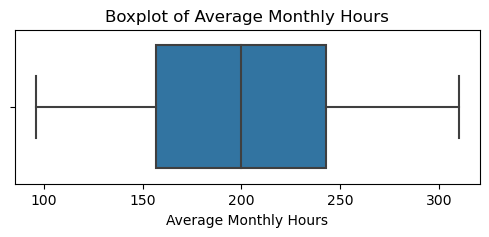

In [12]:
# Boxplot of `average_monthly_hours` to visualize distribution and detect outliers
plt.figure(figsize=(6, 2))
sns.boxplot(x=df["average_monthly_hours"])
plt.title("Boxplot of Average Monthly Hours")
plt.xlabel("Average Monthly Hours")
plt.show()

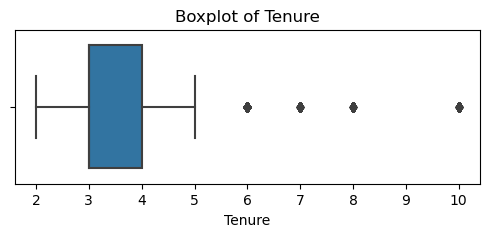

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6, 2))
sns.boxplot(x=df["tenure"])
plt.title("Boxplot of Tenure")
plt.xlabel("Tenure")
plt.show()

In [14]:
# Determine the number of rows containing outliers
q1 = df.tenure.quantile(0.25)
q3 = df.tenure.quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

# Filter the dataframe to find outliers
outliers = df[df.tenure > upper_bound]

# Display the number of outliers
print(f"Number of tenure outliers: {len(outliers)}")
print(f"Outliers percentage of total: {len(outliers) / len(df) * 100:.2f}%")

Number of tenure outliers: 824
Outliers percentage of total: 6.87%


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
# Get percentages of people who left vs. stayed
left_counts = df.left.value_counts()
left_percent = df.left.value_counts(normalize=True) * 100

left_summary = pd.DataFrame({
    "Count": left_counts,
    "Percent": left_percent.round(2)
})

left_summary.index = left_summary.index.map({0: "Stayed", 1: "Left"})
left_summary


,Count,Percent
left,,
Stayed,10000,83.4
Left,1991,16.6


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

c:\Users\johbr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\johbr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\johbr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\johbr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

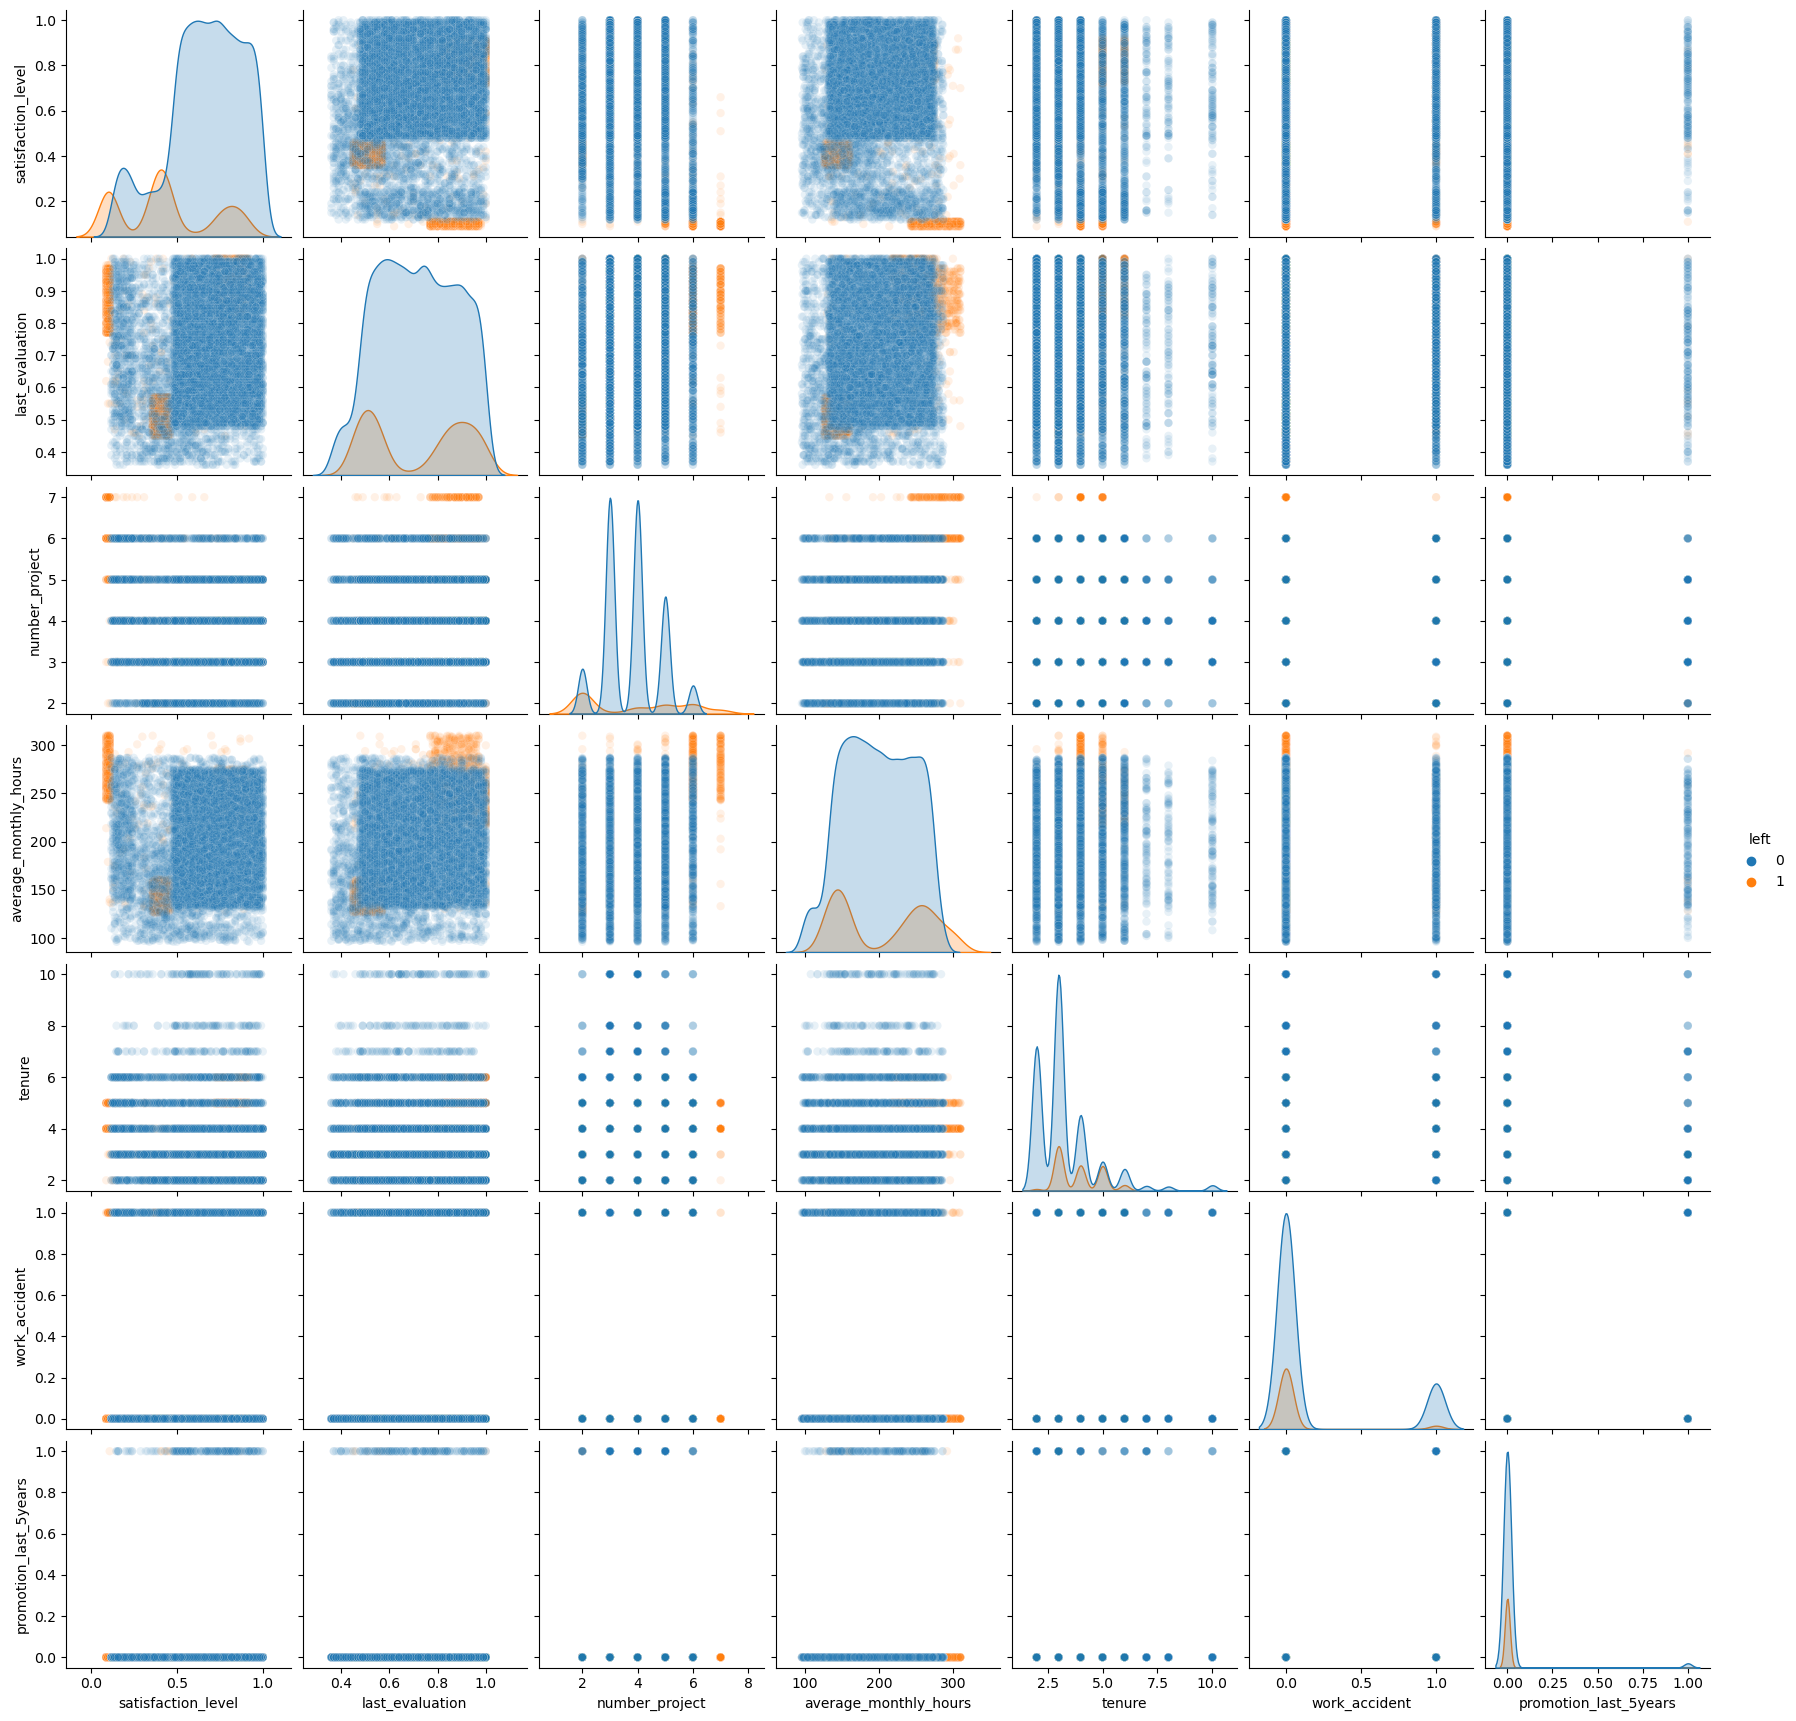

In [34]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue="left", diag_kind="kde", plot_kws={'alpha': 0.1})
plt.show()

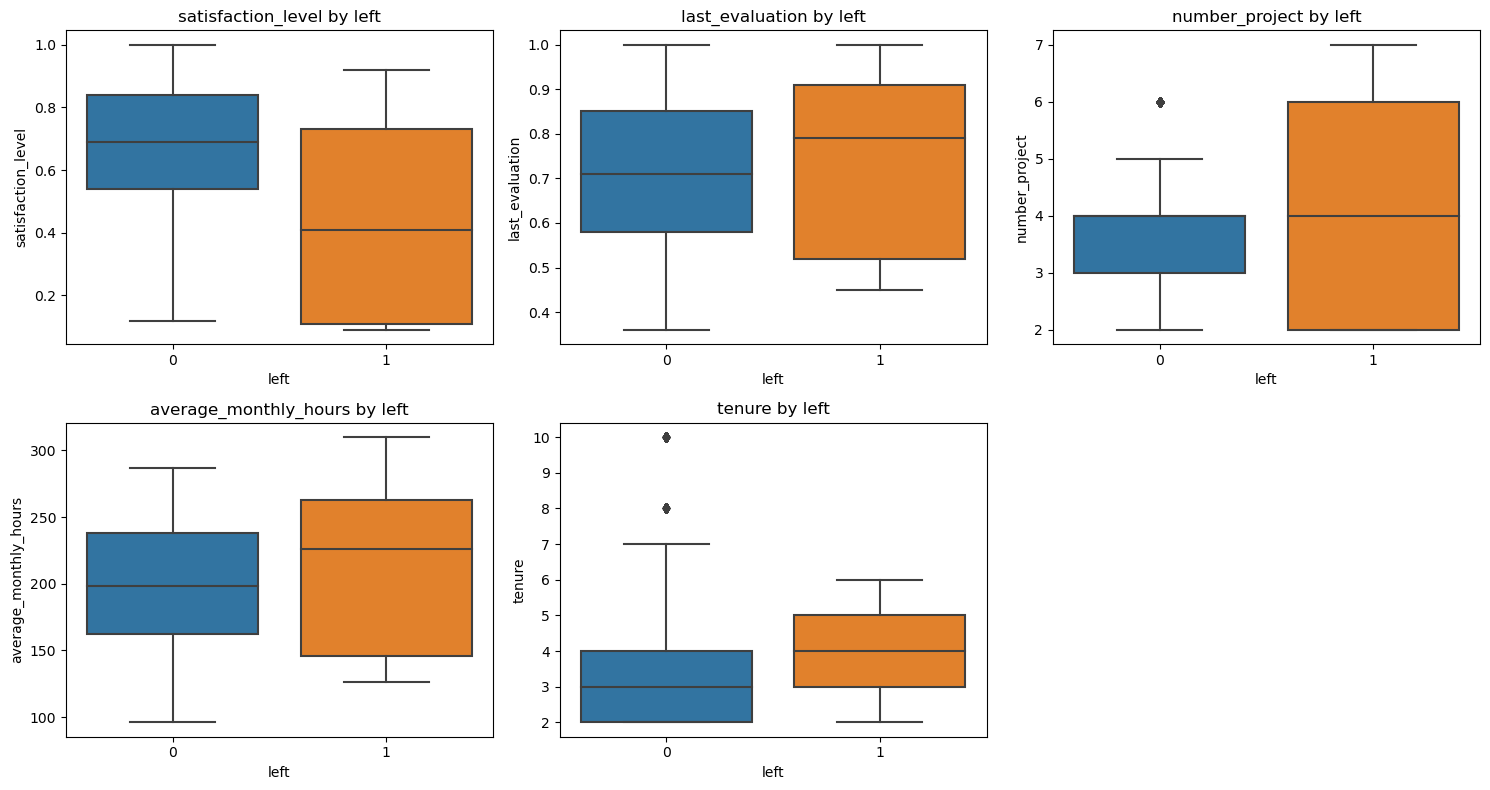

In [17]:
# Boxplots to visualize distributions of numerical features by `left`
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='left', y=col, data=df)
    plt.title(f'{col} by left')
plt.tight_layout()
plt.show()

c:\Users\johbr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\johbr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\johbr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\johbr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: Fut

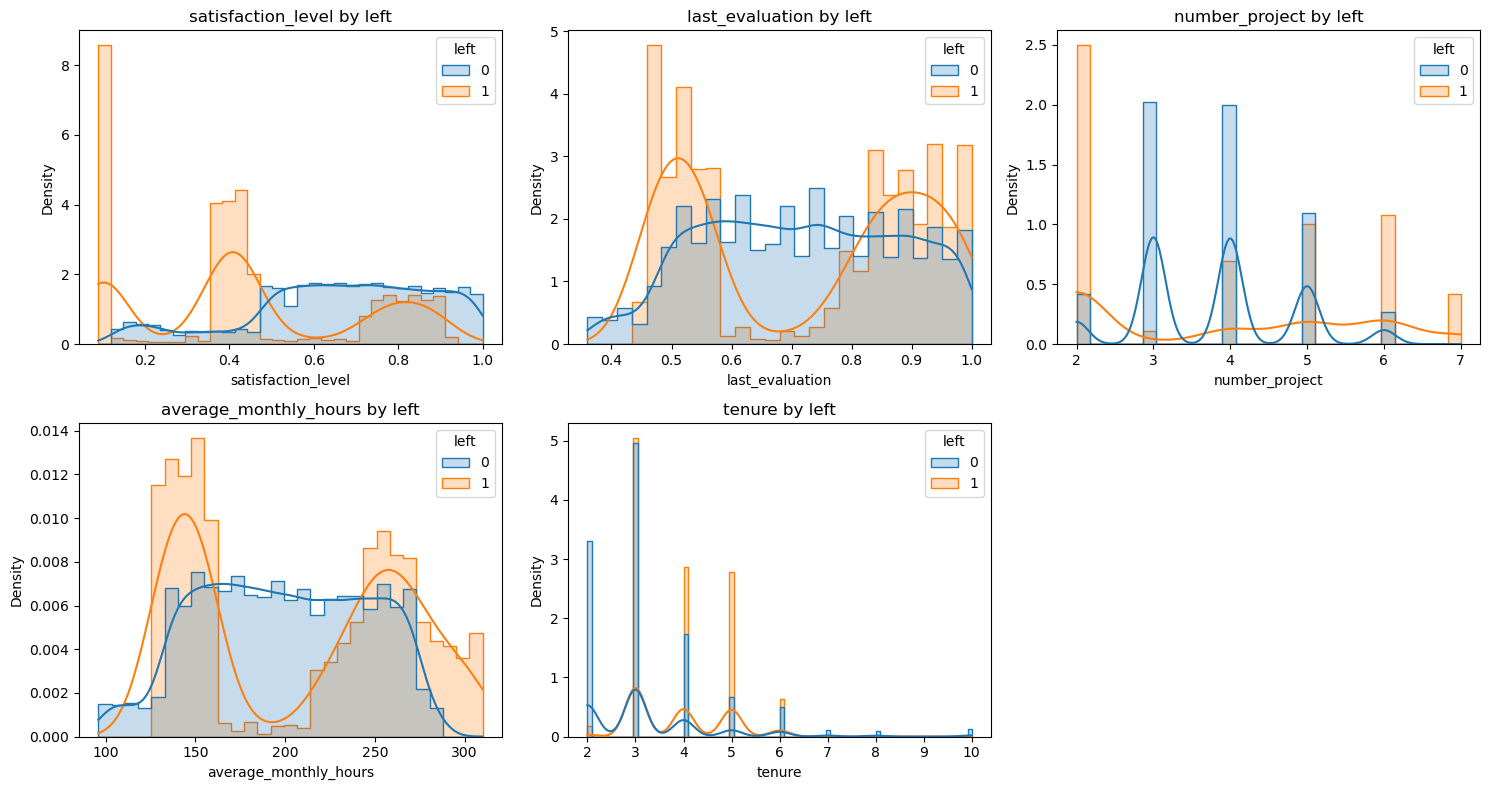

In [18]:
# Histograms to visualize distributions of numerical features
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=col, hue='left', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'{col} by left')
plt.tight_layout()
plt.show()

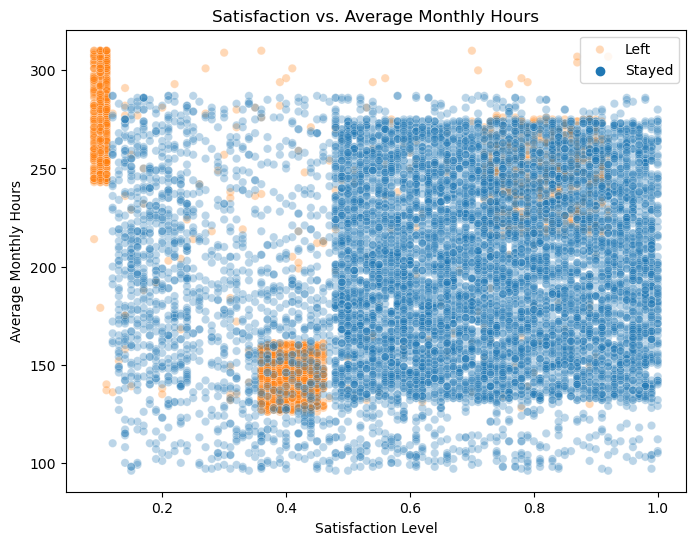

In [19]:
# Plot satisfaction vs. hours worked, colored by left
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="satisfaction_level",
    y="average_monthly_hours",
    hue="left",
    alpha=0.3,
)
plt.title("Satisfaction vs. Average Monthly Hours")
plt.xlabel("Satisfaction Level")
plt.ylabel("Average Monthly Hours")
plt.legend(loc="upper right", labels=["Left", "Stayed"])
plt.show()

Two big clusters of leavers: One absolutely miserable section that worked a lot of hours, and one clump that worked under a 40-hour week that was mildly dissatisfied.

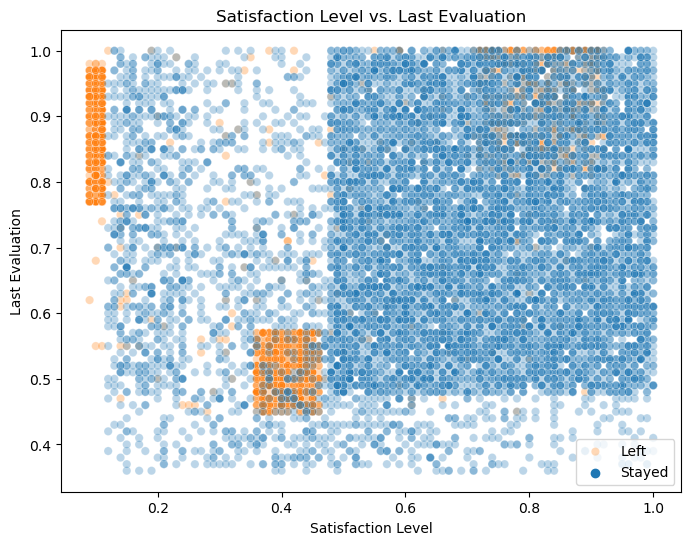

In [20]:
# Plot satisfaction level vs last evaluation, colored by left
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="satisfaction_level",
    y="last_evaluation",
    hue="left",
    alpha=0.3,
)
plt.title("Satisfaction Level vs. Last Evaluation")
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation")
plt.legend(loc="lower right", labels=["Left", "Stayed"])
plt.show()

It's almost the same plot for leavers. The absolutely miserable got pretty good evaluations, and the mildly dissatisfied got middling evaluations.

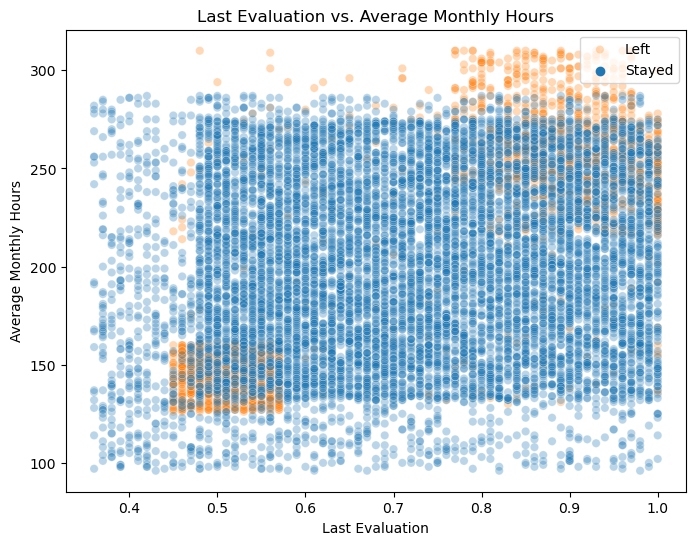

In [21]:
# Plot last evaluation vs. average monthly hours, colored by left
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="last_evaluation",
    y="average_monthly_hours",
    hue="left",
    alpha=0.3,
)
plt.title("Last Evaluation vs. Average Monthly Hours")
plt.xlabel("Last Evaluation")
plt.ylabel("Average Monthly Hours")
plt.legend(loc="upper right", labels=["Left", "Stayed"])
plt.show()

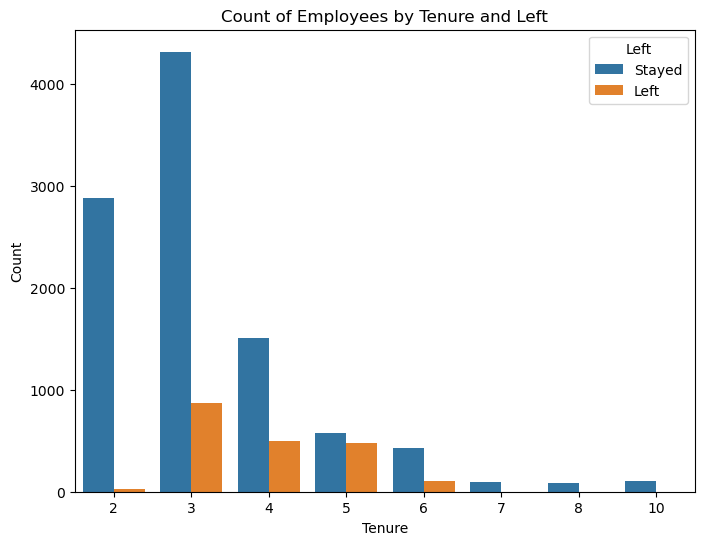

In [22]:
# Bar plot of tenure by left
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="tenure", hue="left")
plt.title("Count of Employees by Tenure and Left")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.legend(title="Left", loc="upper right", labels=["Stayed", "Left"])
plt.show()

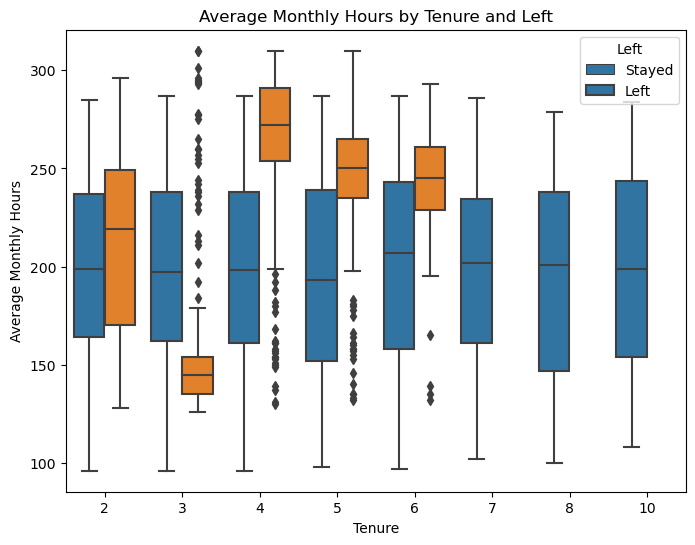

In [23]:
# Boxplot of tenure vs average monthly hours, split by left
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="tenure", y="average_monthly_hours", hue="left")
plt.title("Average Monthly Hours by Tenure and Left")
plt.xlabel("Tenure")
plt.ylabel("Average Monthly Hours")
plt.legend(title="Left", loc="upper right", labels=["Stayed", "Left"])
plt.show()

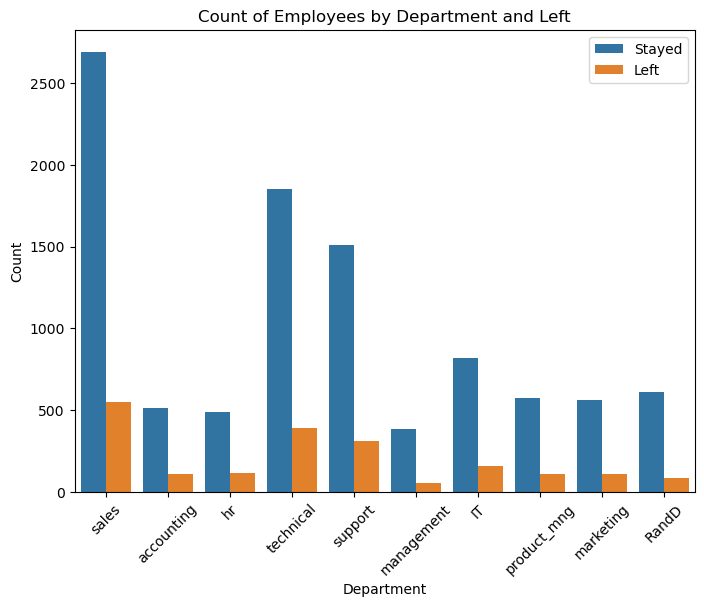

In [24]:
# Bar plot of department vs. left
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="department",
    hue="left",
)
plt.title("Count of Employees by Department and Left")
plt.xlabel("Department")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.xticks(rotation=45)
plt.show()

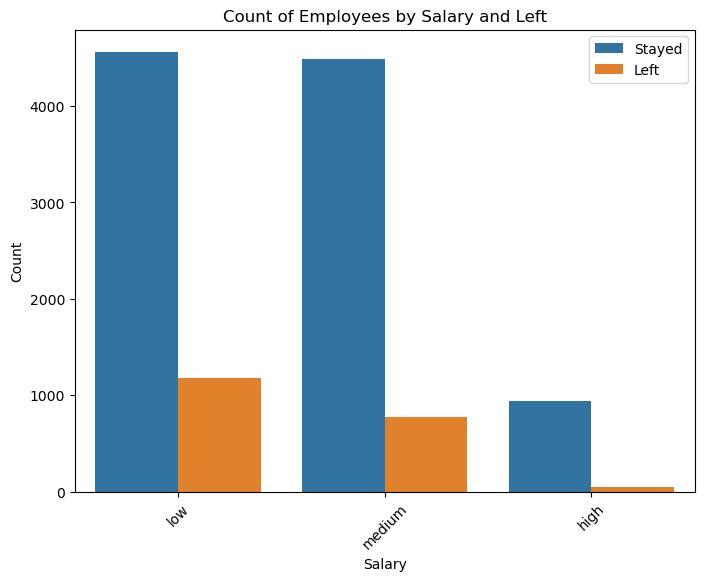

In [25]:
# Bar plot of salary vs. left
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="salary",
    hue="left",
)
plt.title("Count of Employees by Salary and Left")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.xticks(rotation=45)
plt.show()

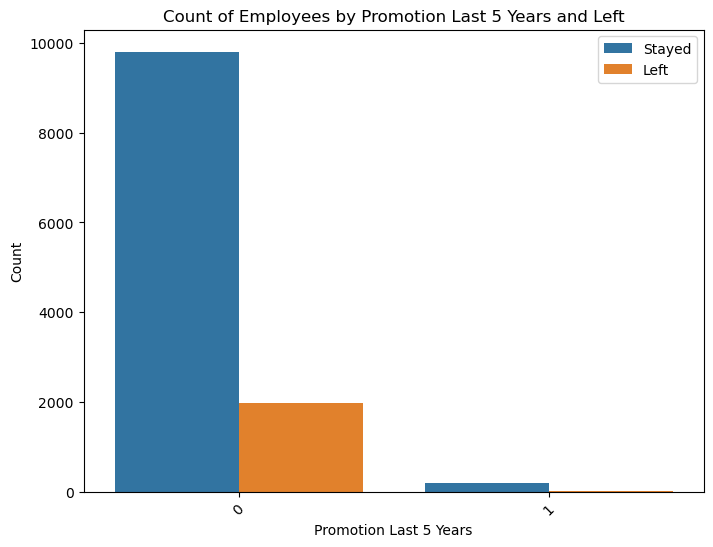

In [26]:
# Bar plot of promotion last 5 years vs. left
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="promotion_last_5years",
    hue="left",
)
plt.title("Count of Employees by Promotion Last 5 Years and Left")
plt.xlabel("Promotion Last 5 Years")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.xticks(rotation=45)
plt.show()

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

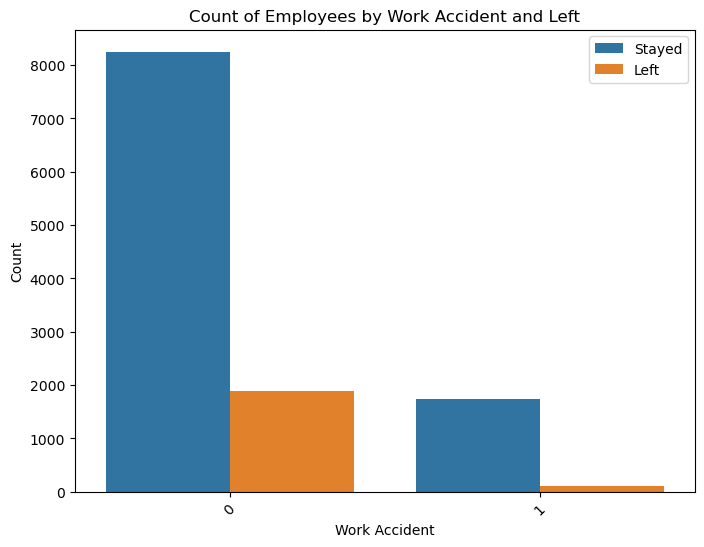

In [27]:
# Bar plot of work accident vs. left
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="work_accident",
    hue="left",
)
plt.title("Count of Employees by Work Accident and Left")
plt.xlabel("Work Accident")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.xticks(rotation=45)

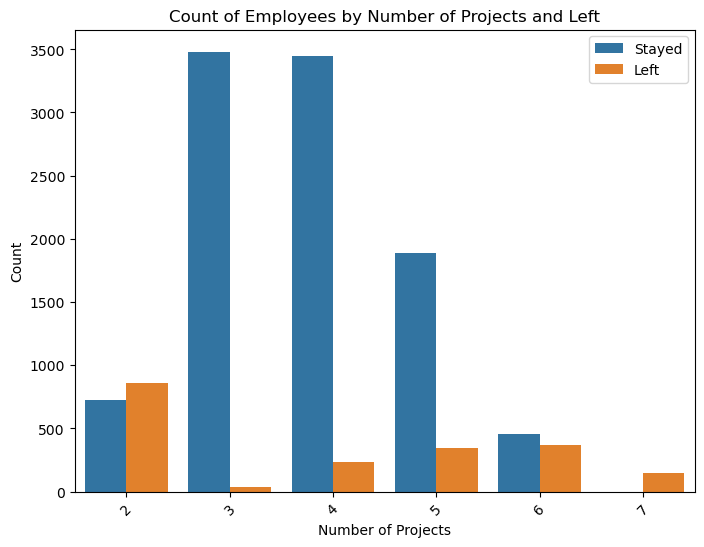

In [28]:
# Bar plot of number of projects vs. left
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="number_project",
    hue="left",
)
plt.title("Count of Employees by Number of Projects and Left")
plt.xlabel("Number of Projects")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.xticks(rotation=45)
plt.show()

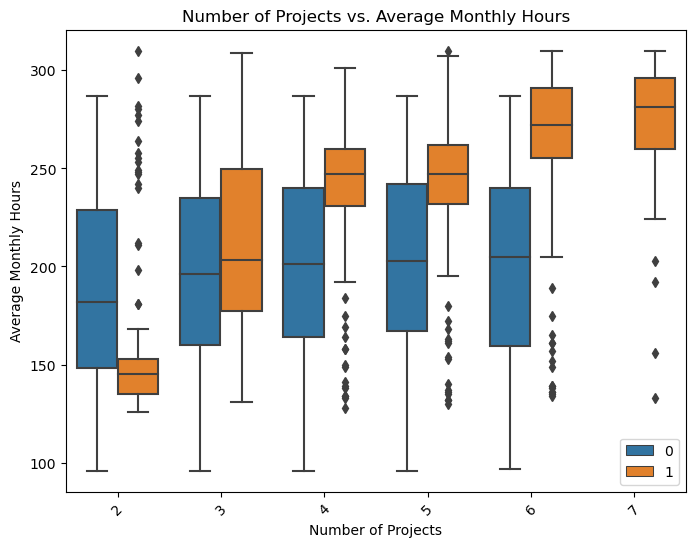

In [29]:
# Boxplot of number of projects vs. average monthly hours, split by left
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="number_project",
    y="average_monthly_hours",
    hue="left",
)
plt.title("Number of Projects vs. Average Monthly Hours")
plt.xlabel("Number of Projects")
plt.ylabel("Average Monthly Hours")
plt.legend(loc="lower right")
plt.xticks(rotation=45)
plt.show()

No outliers for those who stayed. Mostly a function of small sample size? Those who left appear to have been either overworked or underworked. Who has 7 projects and works only 120 hours a week? Weird.

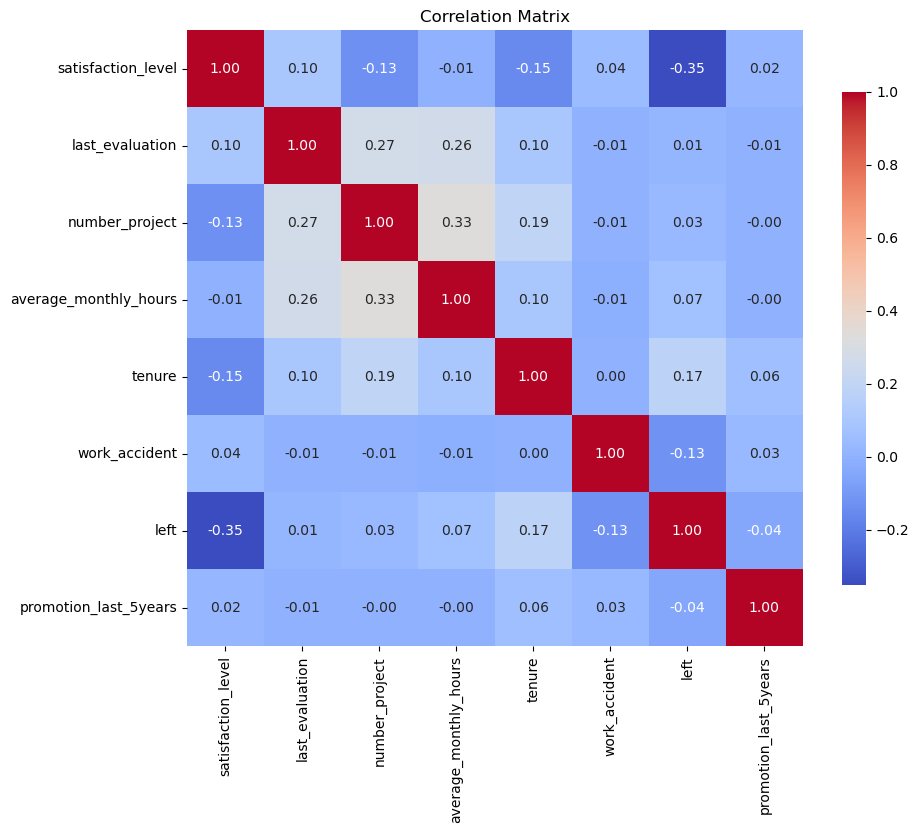

In [30]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    df.select_dtypes(include=[np.number]).corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": .8},
)
plt.title("Correlation Matrix")
plt.show()

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [31]:
### YOUR CODE HERE ###

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.